In [1]:
pip install easyocr

  Obtaining dependency information for easyocr from https://files.pythonhosted.org/packages/cb/0e/09bafec31db720e796d3f5b0814c37c5fdb59dcd35a2c6c6b1c774b09646/easyocr-1.7.1-py3-none-any.whl.metadata
  Using cached easyocr-1.7.1-py3-none-any.whl.metadata (11 kB)
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/e4/ae/2ad8820045b6631965750435f28583e80905b8273d57cf026163b51323ee/torch-2.1.2-cp311-cp311-win_amd64.whl.metadata
  Using cached torch-2.1.2-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Obtaining dependency information for torchvision>=0.5 from https://files.pythonhosted.org/packages/f9/e6/3c821e7417acd82df89e39f09156ce80d58817b5b4b1ac5453b522bc5dd4/torchvision-0.16.2-cp311-cp311-win_amd64.whl.metadata
  Using cached torchvision-0.16.2-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/20/44/458a0a135866f5e08266566b32ad9a182a7a059a894effe6c41


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\Basuru Yasaruwan\Contacts\Desktop\IPCV Practicals\Practical 02 Vehical Number Plate\IM01\Scripts\python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/ca/2a/d197a412ec474391ee878b1218cf2fe9c6e963903755887fc5654c06636a/contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata
  Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/a0/ef/93321cf55180a778b4d97919b28739874c0afab9


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\Basuru Yasaruwan\Contacts\Desktop\IPCV Practicals\Practical 02 Vehical Number Plate\IM01\Scripts\python.exe -m pip install --upgrade pip


In [1]:
import cv2
import easyocr
from matplotlib import pyplot as plt

In [2]:
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve OCR accuracy
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    return blurred

In [3]:
def perform_ocr(image, reader):
    # Perform OCR on the preprocessed image
    result = reader.readtext(image)

    # Extract and return the recognized text
    recognized_text = ' '.join([entry[1] for entry in result])
    return recognized_text

In [4]:
def display_image_with_results(image, recognized_text):
    # Display the image with recognized text
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Recognized Text: {recognized_text}")
    plt.axis('off')
    plt.show()

In [5]:
def number_plate_recognition(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Create an OCR reader using the 'en' language for English text
    reader = easyocr.Reader(['en'])

    # Perform OCR on the preprocessed image
    recognized_text = perform_ocr(preprocessed_image, reader)

    # Display the results
    display_image_with_results(cv2.imread(image_path), recognized_text)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


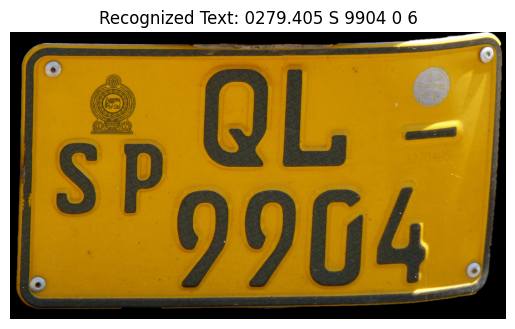

In [6]:
# Example usage
image_path = r'C:\Users\Basuru Yasaruwan\Contacts\Desktop\IPCV Practicals\Practical 02 Vehical Number Plate\IM01\plate1.jpg'
number_plate_recognition(image_path)

In [7]:
import cv2
import easyocr
import numpy as np
from matplotlib import pyplot as plt

In [8]:
def find_number_plate(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use edge detection to find potential contours
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area to find potential number plate region
    potential_plates = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if 1000 < area < 50000:  # Adjust these thresholds based on your specific images
            potential_plates.append(contour)

    # Draw the potential plates on a copy of the original image
    plate_img = img.copy()
    cv2.drawContours(plate_img, potential_plates, -1, (0, 255, 0), 2)

    # Display the image with potential plates
    plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
    plt.title("Potential Number Plates")
    plt.axis('off')
    plt.show()


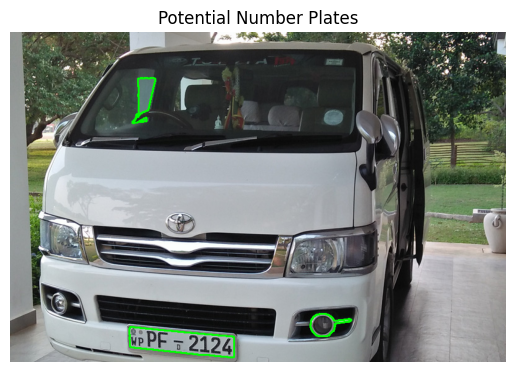

In [9]:
# Example usage
image_path = r'C:\Users\Basuru Yasaruwan\Contacts\Desktop\IPCV Practicals\Practical 02 Vehical Number Plate\IM01\vehicle_3.jpg'
find_number_plate(image_path)